## Analyze the dataset to determine if marketing campaign for Uber was succesful or not in SFO (San Fransisco)

### Chetan Kulkarni

Import Libraries

In [63]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
from scipy import stats
import math

In [64]:
data = pd.read_csv("/Users/chetankulkarni/Documents/Python/ALY6015 - Homework 2 - Hypothesis Testing - SFO.csv")

### Exploratory Data Analysis

Check the shape and first few rows of the data

In [65]:
print(data.shape)
data.head()

(109, 3)


,Date,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
0,09/14/2018,60.343176,0
1,09/15/2018,87.479814,0
2,09/16/2018,97.891608,0
3,09/17/2018,102.560484,0
4,09/18/2018,84.294315,0


Split the date into date, month and year

In [68]:
data_new = data['Date'].str.split('/',expand = True)
data_new.columns = ['month', 'date', 'year']
data.columns = ['Date', 'avg', 'marketing']

Use join to merge the two dataframes

In [70]:
df = data.join(data_new)
df.head()

,Date,avg,marketing,month,date,year
0,09/14/2018,60.343176,0,09,14,2018
1,09/15/2018,87.479814,0,09,15,2018
2,09/16/2018,97.891608,0,09,16,2018
3,09/17/2018,102.560484,0,09,17,2018
4,09/18/2018,84.294315,0,09,18,2018


Describe the data to find the mean, standard deviation and any unusual behaviour

In [72]:
df=df[["Date","month","date","year",'avg','marketing']]
df.describe()

,avg,marketing
count,109.000000,109.000000
mean,53.132375,0.348624
std,31.985009,0.478736
min,3.413107,0.000000
25%,13.527116,0.000000
50%,62.930702,0.000000
75%,76.548053,1.000000
max,117.484360,1.000000


## Data Visualization

Let's check for Months where marketing started, plotting line plot months vs marketing will show this

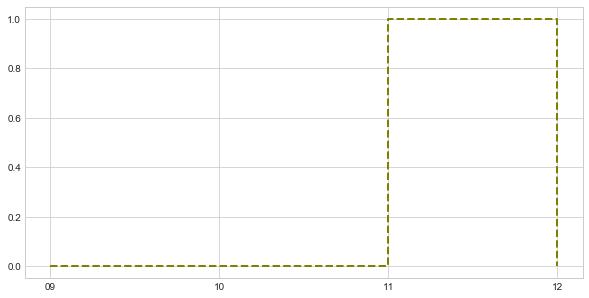

In [74]:
plt.plot('month','marketing', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

As we can see the marketing campaign only started during month of November and December


Let's plot a violin plot to describe the data between marketing vs average

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


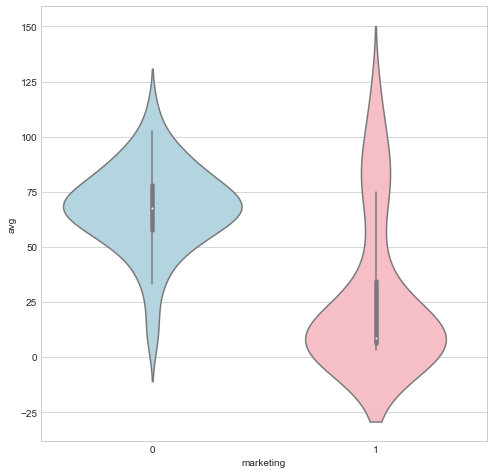

In [76]:
rcParams['figure.figsize'] = 8, 8
sns.violinplot("marketing", "avg", data=df,
               palette=["lightblue", "lightpink"]);

### As we can observe the average miles driven has not increased when the campaign was conducted during Nov, Dec

Let's now split the data into marketing and no marketing as below

In [51]:
Overall_No_Marketing = df[df['marketing']==0]
Overall_Marketing = df[df['marketing']==1]

print(Overall_No_Marketing.shape)
print(Overall_Marketing.shape)

(71, 6)
(38, 6)


Let's plot a distance plot for Marketing vs No marketing. 

The distribution says the average is less when marketing campaign was performed. 

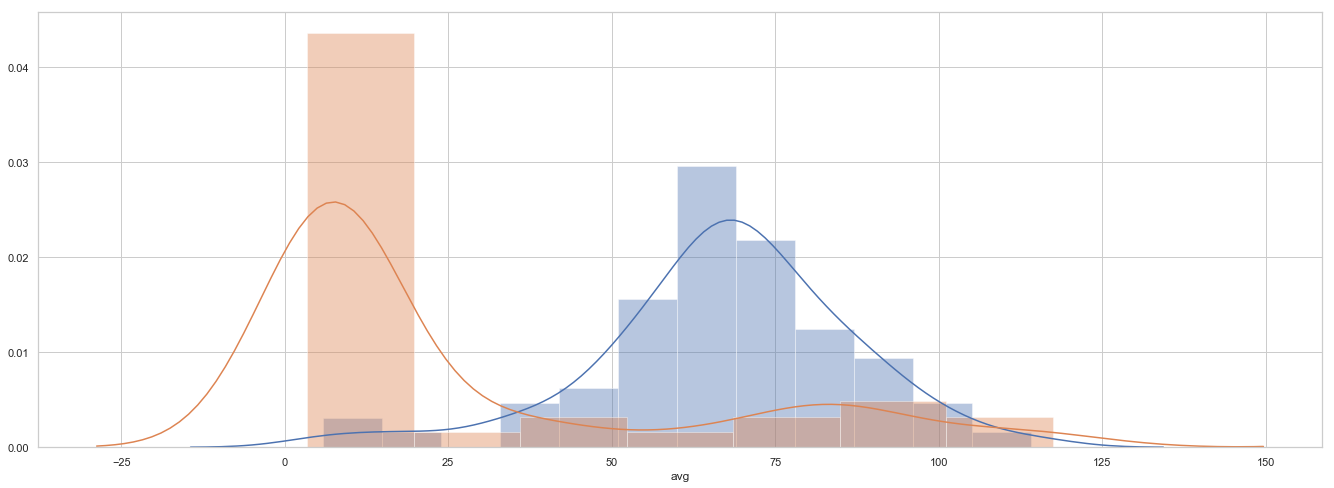

In [77]:
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(Overall_No_Marketing['avg'], hist=True)
ax = sns.distplot(Overall_Marketing['avg'], hist=True)

### Hypothesis Testing

Sample size is greater than 30, Hence we use Z test Otherwise, use a t-test.

- Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.

- Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.

- Your data should be randomly selected from a population, where each item has an equal chance of being selected.

- Sample sizes should be equal if at all possible.

### Null Hypothesis = Average for No Marketing <= Average for Marketing
### Alternate Hypothesis = Average for Marketing > Average for No Marketing


Let's manually calculate the Z-test, we perform the Z test manually using the below formula z = (x – μ) / (σ / √n)

In [81]:
x = np.mean(Overall_No_Marketing['avg'])
σ = np.std(Overall_No_Marketing['avg'])
μ = np.mean(Overall_Marketing['avg'])
n = Overall_Marketing['avg'].shape[0]

print(x,"\n",σ,"\n",μ,"\n",n)

67.42033428494364 
 19.410557582845094 
 26.43645071726316 
 38


In [82]:
print((67.42-19.41)/(26.43/math.sqrt(38)))

11.197635879021588


In [85]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(Overall_Marketing['avg'], x2=None, value=26.43)

print("P-value is",float(pval))

if pval<0.05:
    print("We can the reject null hypothesis")
else:
    print("We can the accept null hypothesis")

P-value is 0.9990601019084664
We can the accept null hypothesis


## Conclusion

We can reject the Null hypothesis as the Z statistic 11.19 is greater than the Z score of 1.96 for 95% confidence.

Also P-value is 0.99 which is greater than 0.05, Hence Null hypothesis can be rejected.

Hence, marketing campaign for Uber was not succesful in increasing the average miles driven per uber driver for SFO region